In [1]:
#clustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [76]:
# rgb of 300 pics csv
df = pd.read_csv('C:/Users/User/Desktop/color/depressed/depressed.csv', encoding='cp949')
df.head()

R    G    B
0   66  117  145
1  119  178  204
2   15   28   33
3   32   72   95
4  157  194  208

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       298 non-null    int64
 1   G       298 non-null    int64
 2   B       298 non-null    int64
dtypes: int64(3)
memory usage: 7.1 KB


In [78]:
df.describe()

R           G           B
count  298.000000  298.000000  298.000000
mean    59.251678  101.033557  148.043624
std     54.920209   61.233935   64.615736
min      0.000000    0.000000    6.000000
25%     13.000000   49.250000   99.250000
50%     42.500000   97.000000  156.000000
75%     87.000000  146.750000  204.000000
max    237.000000  225.000000  253.000000

In [79]:
df_f=df.copy()

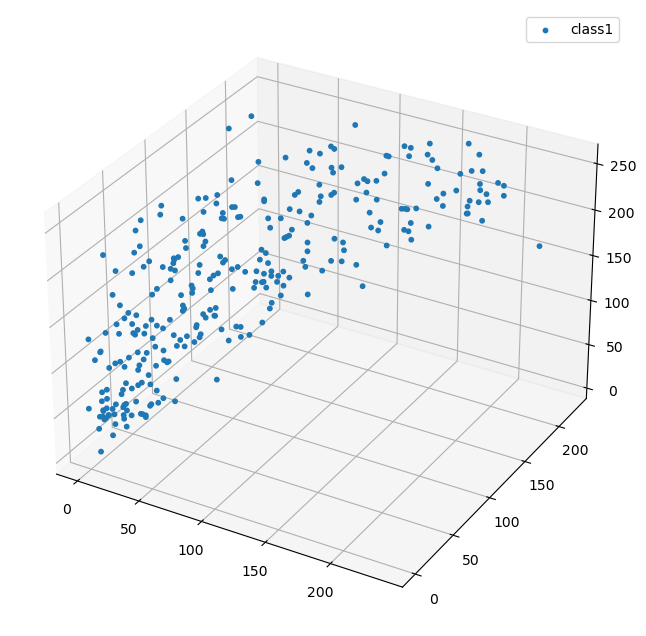

In [80]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_f

# 3d scatterplot 그리기
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
#           , c=X.index #마커컬러
           , s=10 #사이즈
           , cmap="orange" #컬러맵
           , alpha=1 #투명도
           , label='class1' #범례
          )

plt.legend() #범례표시
plt.show()

C:\Users\user\.jupyter\dd\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


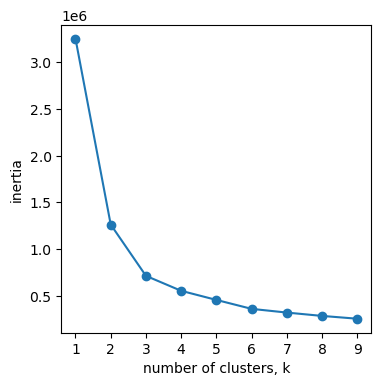

In [81]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [82]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

            0           1           2
0   45.708333  101.050000  165.383333
1   14.877551   36.163265   72.285714
2  133.925000  180.475000  214.837500
[0 2 1 1 2 0 0 0 2 1]


In [83]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()

R    G    B  clust
0   66  117  145      0
1  119  178  204      2
2   15   28   33      1
3   32   72   95      1
4  157  194  208      2

0    120
1     98
2     80
Name: clust, dtype: int64


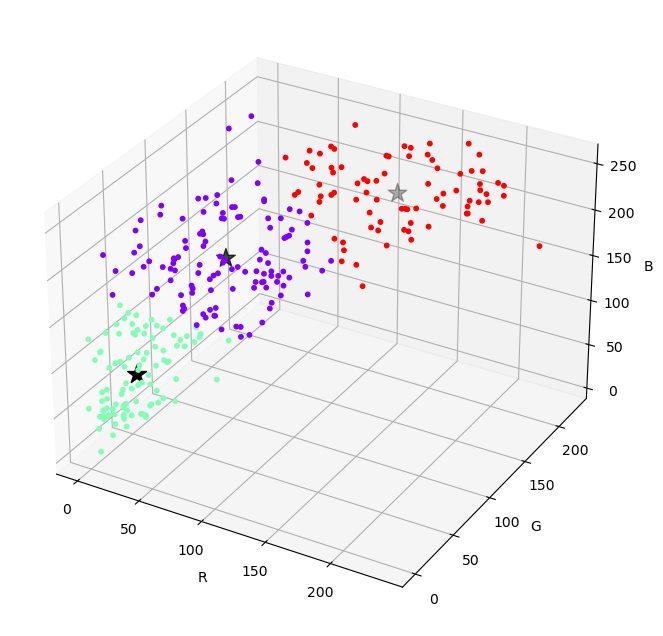

In [84]:
# 3차원으로 시각화하기

# Count the number of dots in each cluster
cluster_counts = clust_df['clust'].value_counts()
print(cluster_counts)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

In [85]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

R           G           B
clust                                    
0       45.708333  101.050000  165.383333
1       14.877551   36.163265   72.285714
2      133.925000  180.475000  214.837500

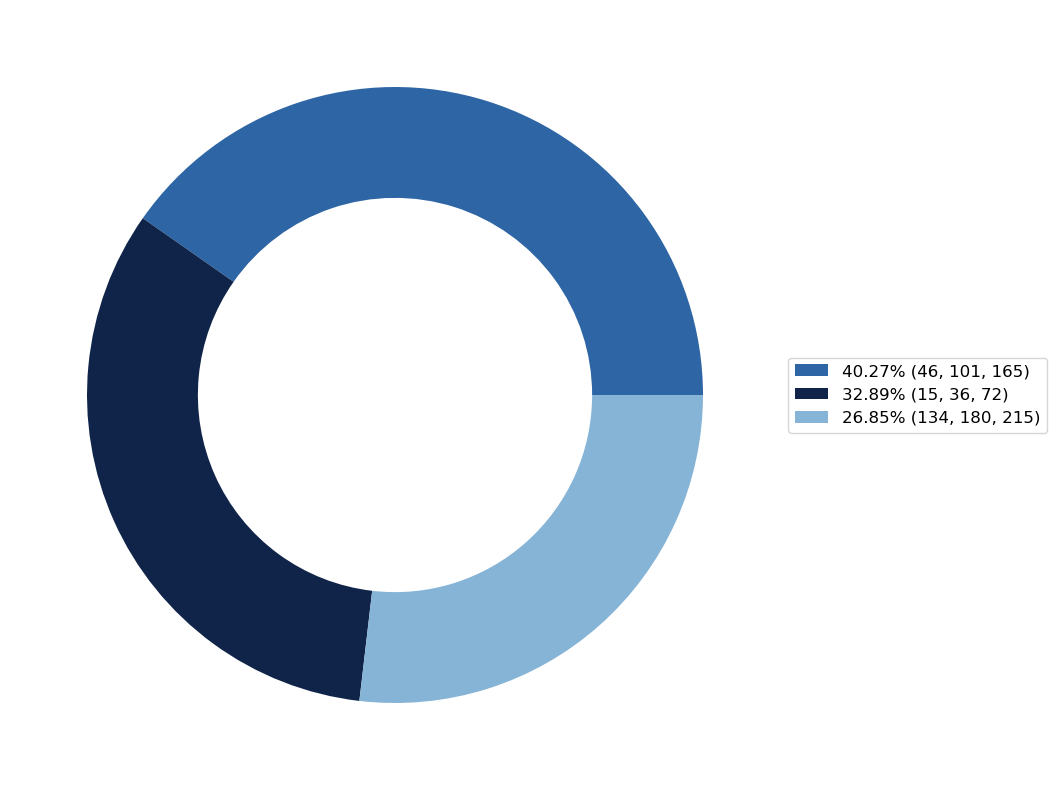

In [86]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(46, 101, 165), (15, 36, 72), (134, 180,215)]
percentages = np.array([(120/298), (98/298), (80/298)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [87]:
# rgb of 300 pics csv
df = pd.read_csv('C:/Users/User/Desktop/color/depressed/depressed_ext.csv', encoding='cp949')
df.head()

R    G    B
0  12   13   17
1  79  128  160
2  16   49   58
3  35   80  101
4  39  104  132

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       300 non-null    int64
 1   G       300 non-null    int64
 2   B       300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [89]:
df.describe()

R           G           B
count  300.000000  300.000000  300.000000
mean    51.600000   91.413333  137.166667
std     56.175847   66.723428   76.316969
min      0.000000    0.000000    0.000000
25%      6.000000   32.000000   65.750000
50%     28.500000   77.500000  142.500000
75%     89.000000  147.250000  206.250000
max    200.000000  230.000000  255.000000

In [90]:
df_f=df.copy()

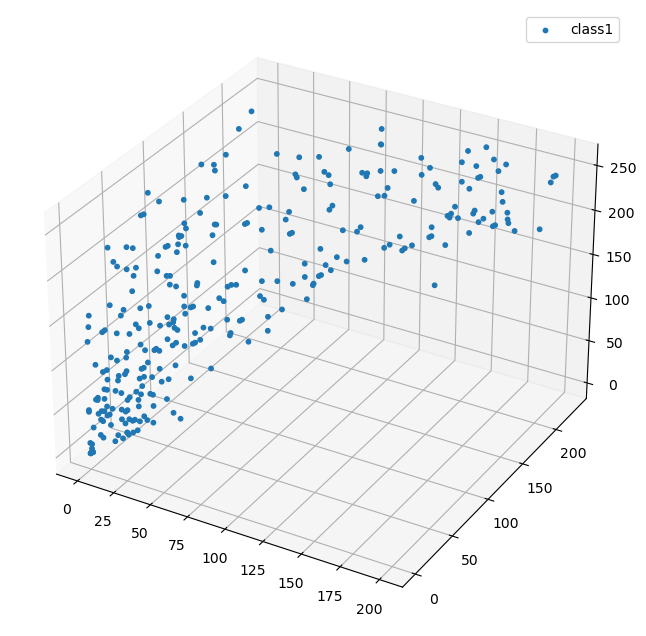

In [91]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_f

# 3d scatterplot 그리기
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
#           , c=X.index #마커컬러
           , s=10 #사이즈
           , cmap="orange" #컬러맵
           , alpha=1 #투명도
           , label='class1' #범례
          )

plt.legend() #범례표시
plt.show()

C:\Users\user\.jupyter\dd\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


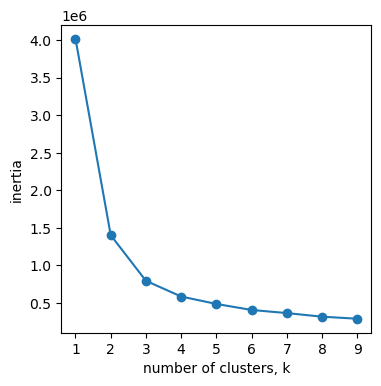

In [92]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [93]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

            0           1           2
0   12.112069   28.318966   55.594828
1  130.150000  181.650000  220.837500
2   35.221154   92.375000  163.788462
[0 2 0 2 2 2 2 2 2 0]


In [94]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()

R    G    B  clust
0  12   13   17      0
1  79  128  160      2
2  16   49   58      0
3  35   80  101      2
4  39  104  132      2

0    116
2    104
1     80
Name: clust, dtype: int64


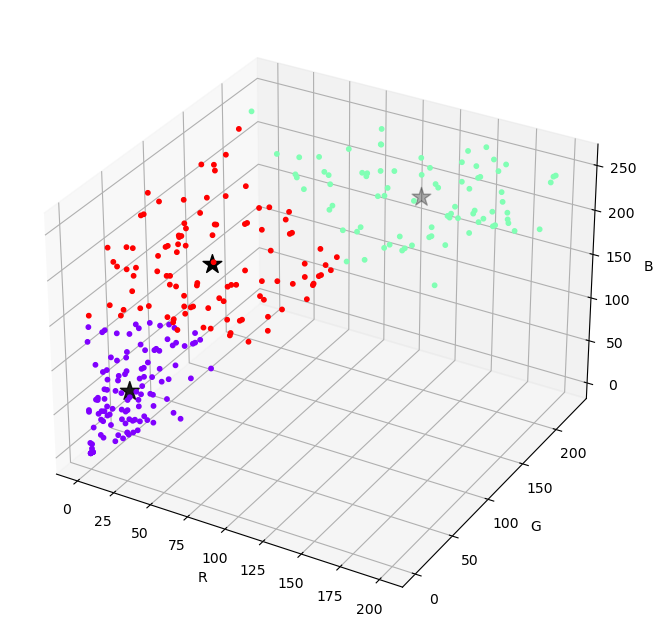

In [95]:
# 3차원으로 시각화하기

# Count the number of dots in each cluster
cluster_counts = clust_df['clust'].value_counts()
print(cluster_counts)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

In [96]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

R           G           B
clust                                    
0       12.112069   28.318966   55.594828
1      130.150000  181.650000  220.837500
2       35.221154   92.375000  163.788462

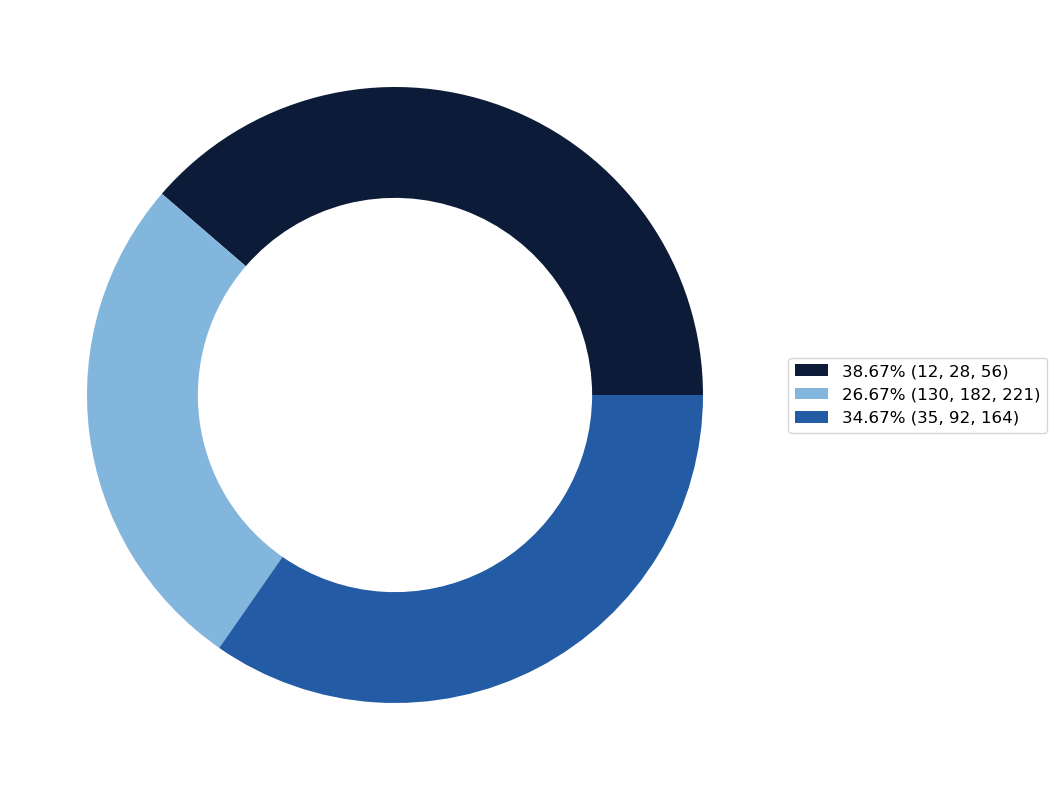

In [97]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(12,28,56),(130,182,221),(35,92,164)]
percentages = np.array([(116/300), (80/300), (104/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [98]:
# rgb of 300 pics csv
df = pd.read_csv('C:/Users/User/Desktop/color/dreamy/dreamy.csv', encoding='cp949')
df.head()

R    G    B
0  141  104  149
1  209  195  211
2  187  135  175
3  203  152  211
4  249  189  206

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       300 non-null    int64
 1   G       300 non-null    int64
 2   B       300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [100]:
df.describe()

R           G           B
count  300.000000  300.000000  300.000000
mean   152.116667  126.280000  176.750000
std     59.922997   56.403482   50.632463
min     20.000000   10.000000   47.000000
25%    104.500000   84.750000  143.750000
50%    157.500000  127.500000  186.000000
75%    203.000000  170.000000  217.000000
max    251.000000  245.000000  251.000000

In [101]:
df_f=df.copy()

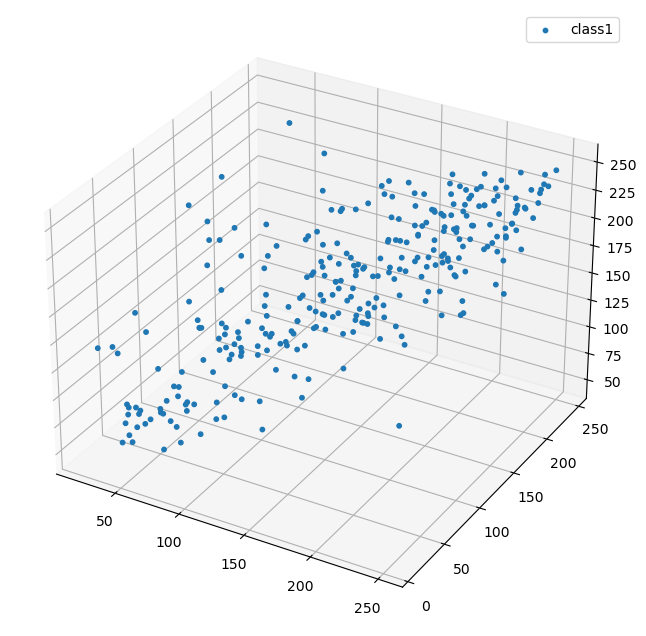

In [102]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_f

# 3d scatterplot 그리기
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
#           , c=X.index #마커컬러
           , s=10 #사이즈
           , cmap="orange" #컬러맵
           , alpha=1 #투명도
           , label='class1' #범례
          )

plt.legend() #범례표시
plt.show()

C:\Users\user\.jupyter\dd\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


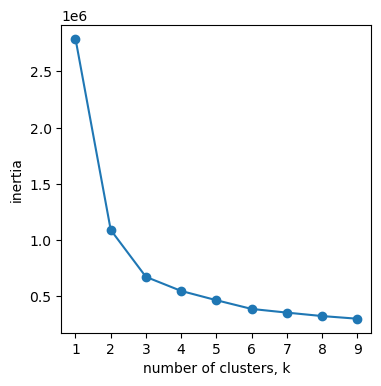

In [103]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [107]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집
# Add predicted clusters to the original DataFrame
clust_df = df_f.copy()
clust_df['clust'] = pred

print(pd.DataFrame(centers))
print(pred[:10])

            0           1           2
0   74.690141   53.577465  106.619718
1  140.247706  113.385321  178.311927
2  208.708333  181.008333  216.825000
[1 2 1 2 2 1 1 2 1 1]


In [108]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()

R    G    B  clust
0  141  104  149      1
1  209  195  211      2
2  187  135  175      1
3  203  152  211      2
4  249  189  206      2

2    120
1    109
0     71
Name: clust, dtype: int64


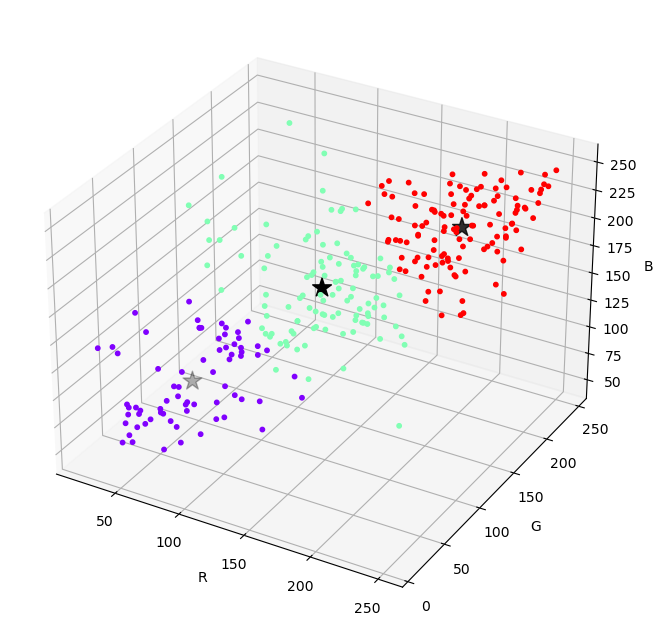

In [110]:
# 3차원으로 시각화하기

# Count the number of dots in each cluster
cluster_counts = clust_df['clust'].value_counts()
print(cluster_counts)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

In [111]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

R           G           B
clust                                    
0       74.690141   53.577465  106.619718
1      140.247706  113.385321  178.311927
2      208.708333  181.008333  216.825000

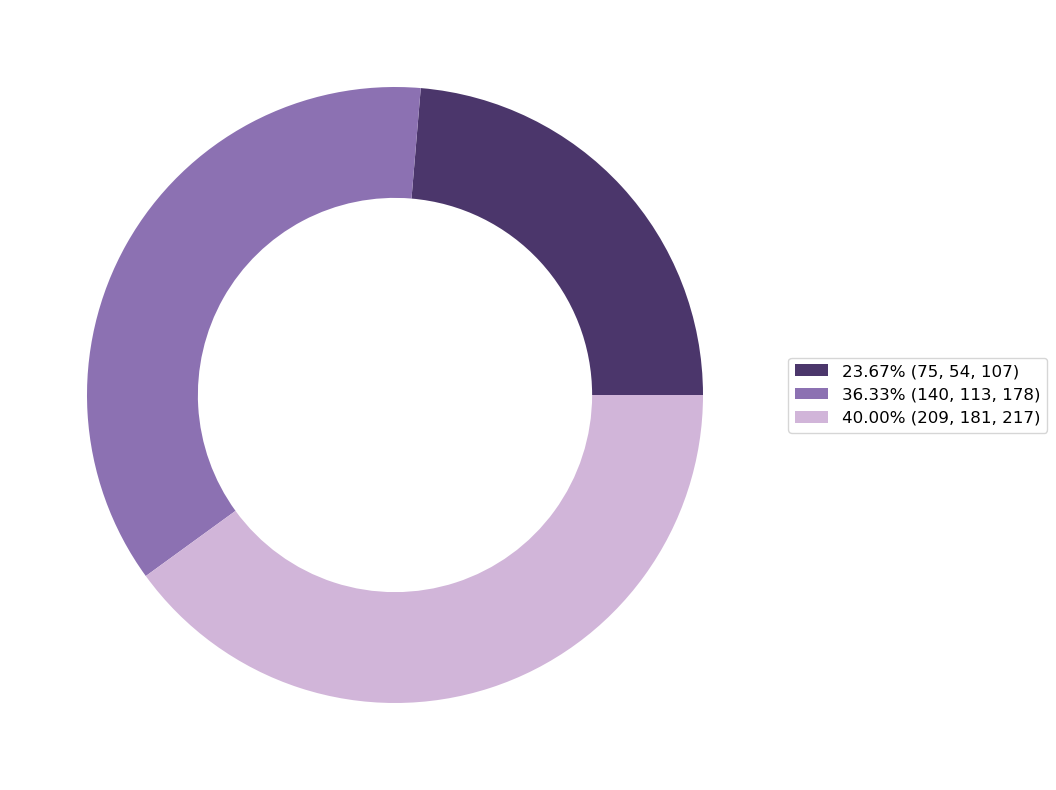

In [113]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(75,54,107),(140,113,178),(209,181,217)]
percentages = np.array([(71/300), (109/300), (120/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [62]:
# rgb of 300 pics csv
df = pd.read_csv('C:/Users/User/Desktop/color/romantic/romantic.csv', encoding='cp949')
df.head()

R    G    B
0  223   93  142
1  252  206  235
2  147   19   42
3   81   16   83
4  184   53  144

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       300 non-null    int64
 1   G       300 non-null    int64
 2   B       300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [64]:
df.describe()

R           G           B
count  300.000000  300.000000  300.000000
mean   201.853333   96.553333  118.550000
std     52.040746   65.050486   64.202393
min     19.000000    0.000000    0.000000
25%    176.750000   40.000000   67.500000
50%    221.000000   93.500000  122.000000
75%    244.250000  147.250000  171.000000
max    254.000000  241.000000  238.000000

In [65]:
df_f=df.copy()

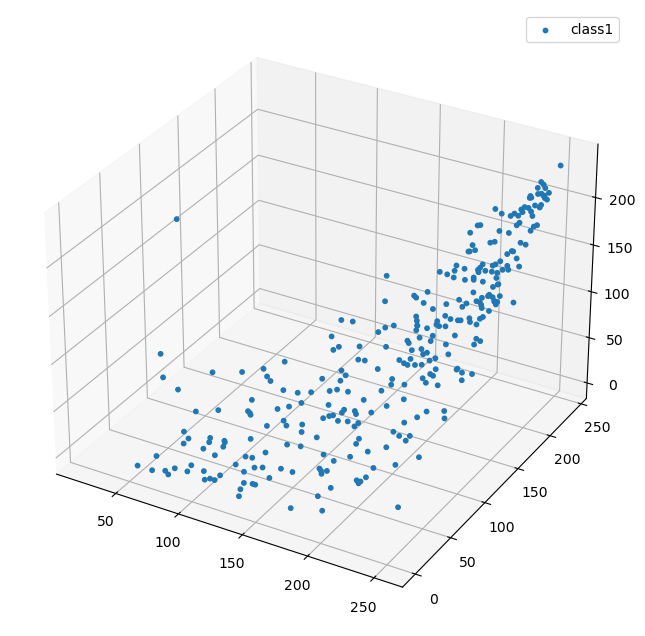

In [66]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_f

# 3d scatterplot 그리기
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
#           , c=X.index #마커컬러
           , s=10 #사이즈
           , cmap="orange" #컬러맵
           , alpha=1 #투명도
           , label='class1' #범례
          )

plt.legend() #범례표시
plt.show()

C:\Users\user\.jupyter\dd\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


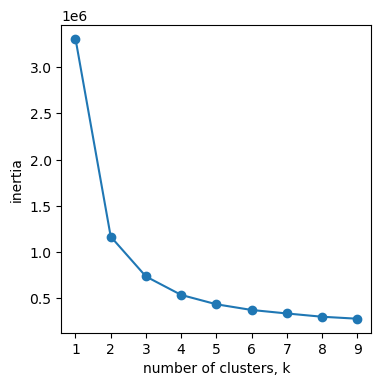

In [67]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [68]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

            0           1           2
0  217.980198   89.108911  120.079208
1  143.757576   27.777778   46.686869
2  243.080000  172.160000  188.150000
[0 2 1 1 0 2 1 1 0 0]


In [69]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()

R    G    B  clust
0  223   93  142      0
1  252  206  235      2
2  147   19   42      1
3   81   16   83      1
4  184   53  144      0

0    101
2    100
1     99
Name: clust, dtype: int64


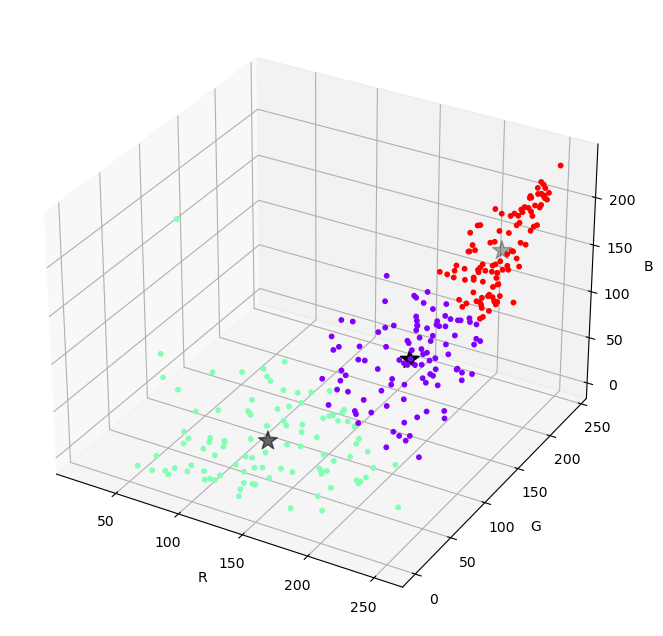

In [70]:
# 3차원으로 시각화하기
# Count the number of dots in each cluster
cluster_counts = clust_df['clust'].value_counts()
print(cluster_counts)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

In [72]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

R           G           B
clust                                    
0      217.980198   89.108911  120.079208
1      143.757576   27.777778   46.686869
2      243.080000  172.160000  188.150000

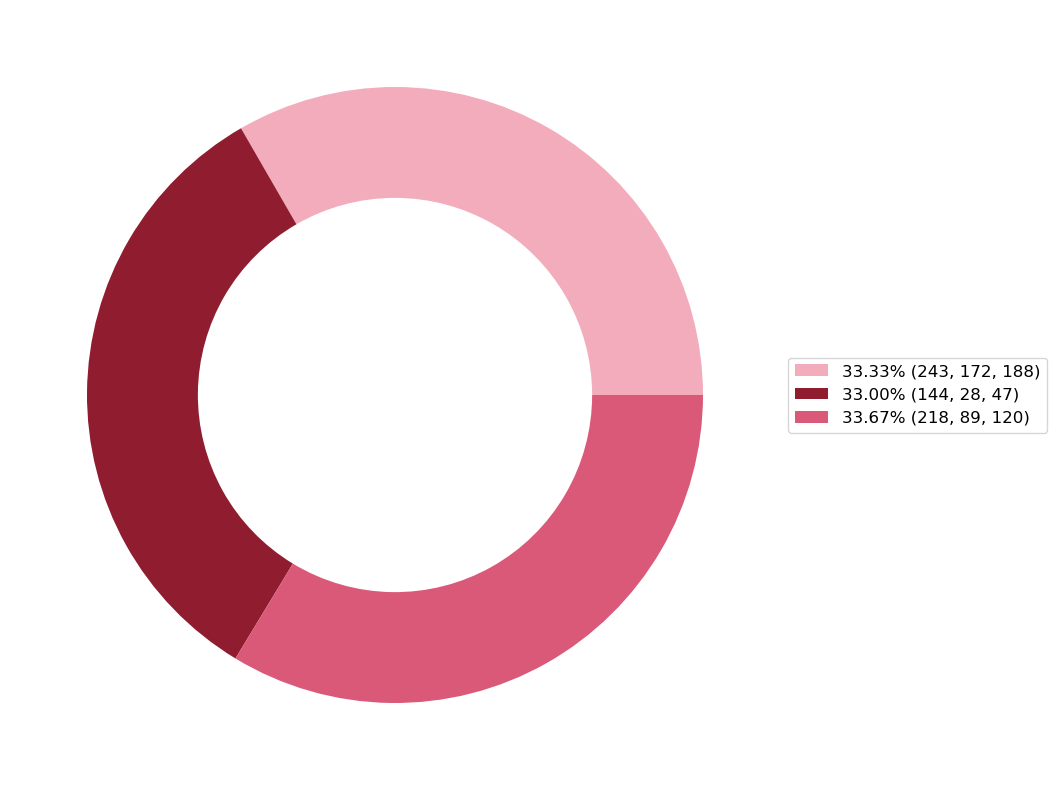

In [75]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(243, 172, 188), (144, 28, 47), (218, 89, 120)]
percentages = np.array([(100/300), (99/300), (101/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [114]:
# rgb of 300 pics csv
df = pd.read_csv('C:/Users/User/Desktop/color/healing/healing.csv', encoding='cp949')
df.head()

R    G    B
0   72  205   53
1   21  132   18
2  192  246  116
3   40  125  102
4  161  197  158

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       300 non-null    int64
 1   G       300 non-null    int64
 2   B       300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [116]:
df.describe()

R           G           B
count  300.000000  300.000000  300.000000
mean   130.140000  172.726667  105.360000
std     66.325188   53.348779   70.318937
min      4.000000   51.000000    3.000000
25%     72.750000  131.500000   42.750000
50%    135.500000  182.000000   94.500000
75%    181.250000  216.000000  165.000000
max    253.000000  254.000000  253.000000

In [117]:
df_f=df.copy()

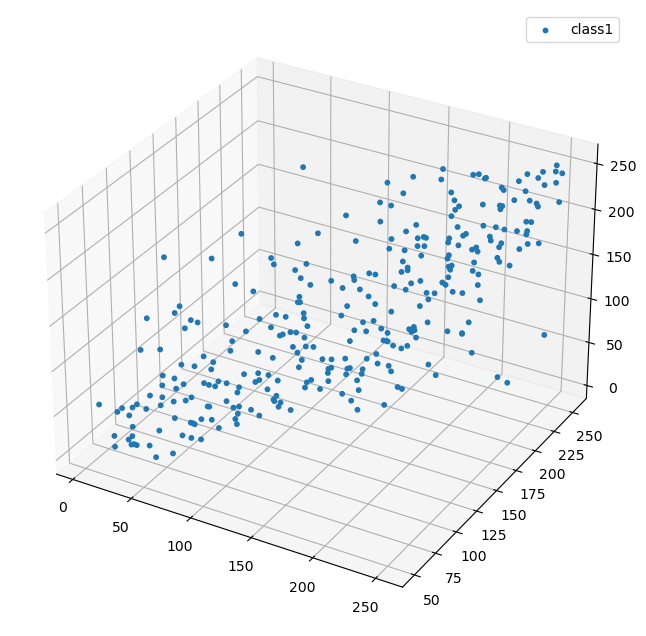

In [118]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_f

# 3d scatterplot 그리기
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
#           , c=X.index #마커컬러
           , s=10 #사이즈
           , cmap="orange" #컬러맵
           , alpha=1 #투명도
           , label='class1' #범례
          )

plt.legend() #범례표시
plt.show()

C:\Users\user\.jupyter\dd\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


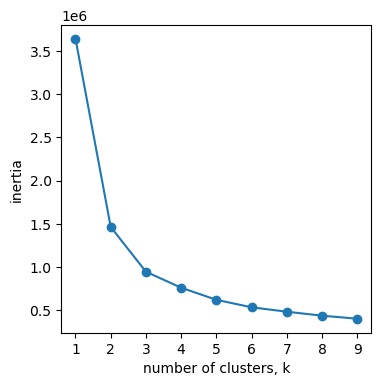

In [119]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [120]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

            0           1           2
0  194.288462  222.394231  185.567308
1  133.692308  181.500000   76.980769
2   53.608696  106.663043   46.771739
[1 2 0 2 0 1 0 0 0 0]


In [121]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()

R    G    B  clust
0   72  205   53      1
1   21  132   18      2
2  192  246  116      0
3   40  125  102      2
4  161  197  158      0

1    104
0    104
2     92
Name: clust, dtype: int64


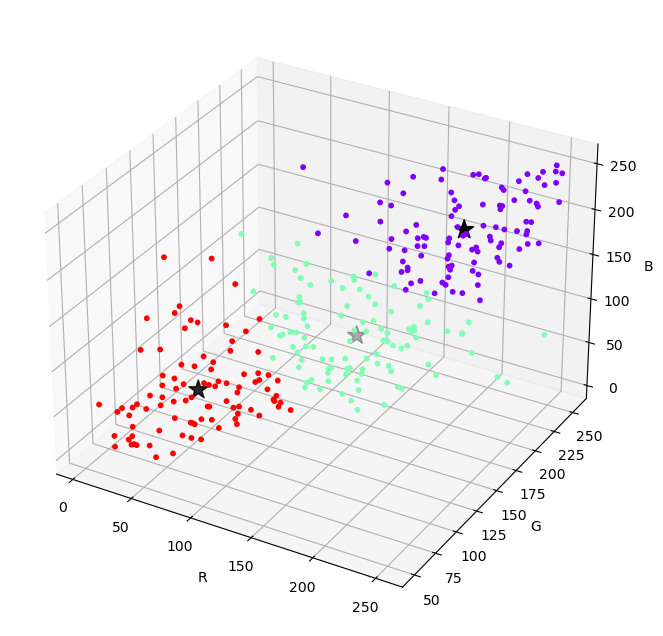

In [122]:
# 3차원으로 시각화하기
# Count the number of dots in each cluster
cluster_counts = clust_df['clust'].value_counts()
print(cluster_counts)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

In [123]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

R           G           B
clust                                    
0      194.288462  222.394231  185.567308
1      133.692308  181.500000   76.980769
2       53.608696  106.663043   46.771739

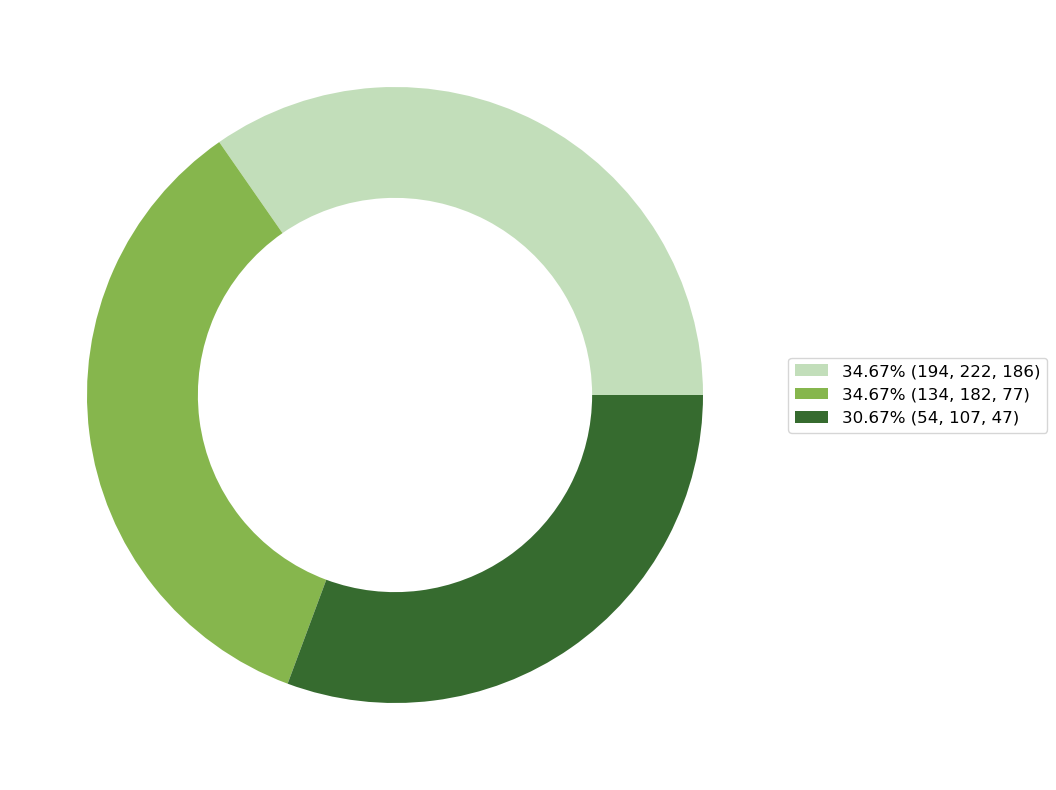

In [124]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(194, 222, 186), (134, 182, 77), (54, 107, 47)]
percentages = np.array([(104/300), (104/300), (92/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

In [125]:
# rgb of 300 pics csv
df = pd.read_csv('C:/Users/User/Desktop/color/joy/joy.csv', encoding='cp949')
df.head()

R    G    B
0  231  181   49
1  107   82   36
2  222  194  141
3  247  239  174
4  102   76   35

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       300 non-null    int64
 1   G       300 non-null    int64
 2   B       300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [127]:
df.describe()

R           G           B
count  300.000000  300.000000  300.000000
mean   209.083333  169.980000   82.533333
std     50.924986   57.822583   67.932208
min     18.000000   10.000000    0.000000
25%    189.750000  129.750000   23.500000
50%    227.000000  183.500000   63.000000
75%    247.250000  214.250000  128.250000
max    254.000000  254.000000  254.000000

In [128]:
df_f=df.copy()

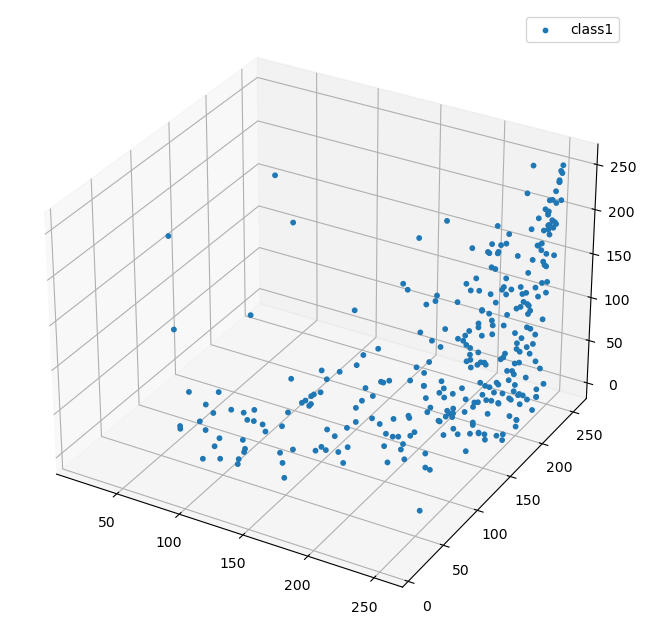

In [129]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = df_f

# 3d scatterplot 그리기
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
#           , c=X.index #마커컬러
           , s=10 #사이즈
           , cmap="orange" #컬러맵
           , alpha=1 #투명도
           , label='class1' #범례
          )

plt.legend() #범례표시
plt.show()

C:\Users\user\.jupyter\dd\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


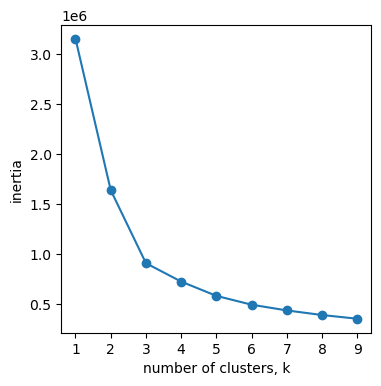

In [130]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_f)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [131]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 3 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(df_f) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(df_f) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

            0           1           2
0  233.670000  218.440000  165.280000
1  133.641791   84.970149   35.910448
2  228.601504  176.368421   43.804511
[2 1 0 0 1 2 0 1 2 2]


In [132]:
# 원래 데이터에 예측된 군집 붙이기
clust_df = df_f.copy()
clust_df['clust'] = pred
clust_df.head()

R    G    B  clust
0  231  181   49      2
1  107   82   36      1
2  222  194  141      0
3  247  239  174      0
4  102   76   35      1

2    133
0    100
1     67
Name: clust, dtype: int64


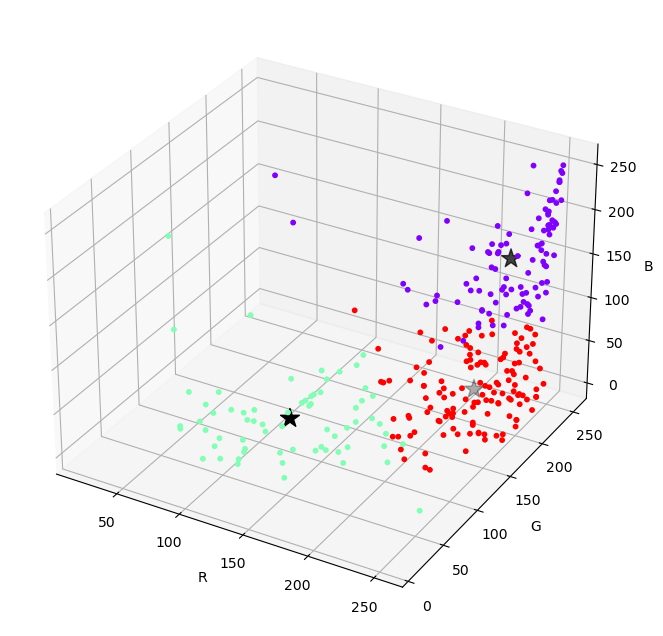

In [133]:
# 3차원으로 시각화하기
# Count the number of dots in each cluster
cluster_counts = clust_df['clust'].value_counts()
print(cluster_counts)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

In [134]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

R           G           B
clust                                    
0      233.670000  218.440000  165.280000
1      133.641791   84.970149   35.910448
2      228.601504  176.368421   43.804511

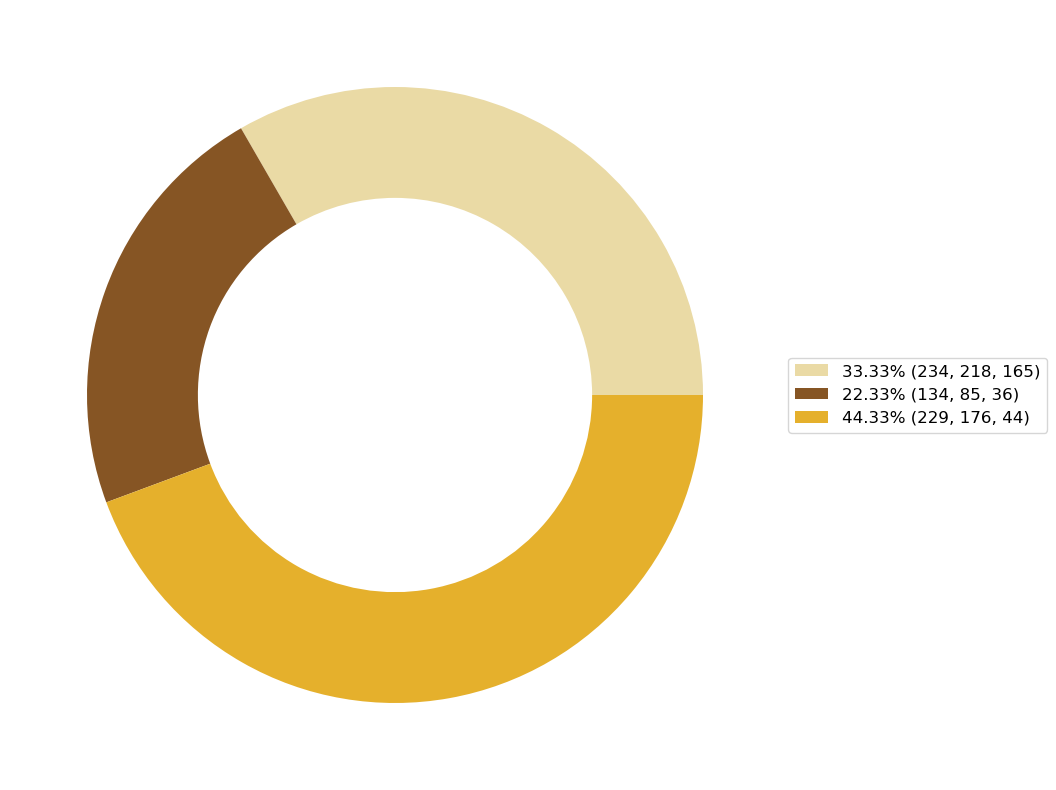

In [135]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(234, 218, 165), (134, 85, 36), (229, 176, 44)]
percentages = np.array([(100/300), (67/300), (133/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

 0    159
-1     79
 1     35
 2     27
Name: clust, dtype: int64


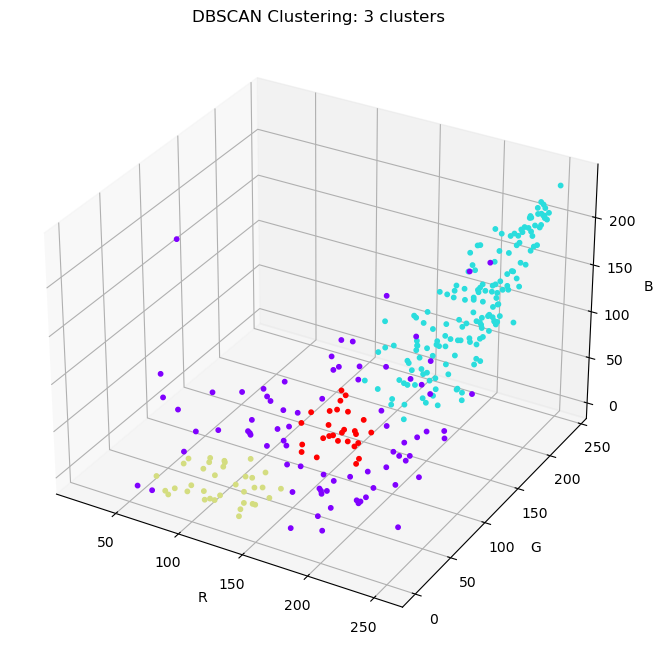

                R           G           B
clust                                    
-1     178.265823   46.924051   82.341772
 0     235.270440  147.371069  164.628931
 1     117.028571   11.828571   21.828571
 2     184.037037   52.333333   78.518519


In [212]:
#dbscan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

df = pd.read_csv('C:/Users/User/Desktop/color/romantic/romantic.csv', encoding='cp949')
df_f = df.copy()

# Create the DBSCAN model#15/10//20/10//25/15
dbscan_model = DBSCAN(eps=28.0, min_samples=15)

# Fit the model to the data
dbscan_model.fit(df_f)

# Get the cluster labels
labels = dbscan_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of dots in each cluster
cluster_counts = df_f['clust'].value_counts()
print(cluster_counts)

# Get the unique cluster labels (excluding noise points)
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - 1

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'DBSCAN Clustering: {n_clusters} clusters')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

 0    183
-1     55
 1     36
 2     26
Name: clust, dtype: int64


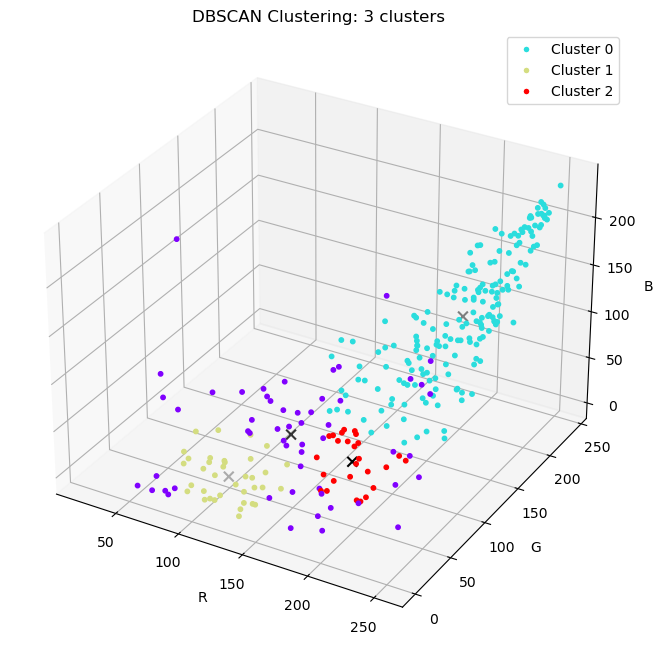

                R           G           B
clust                                    
-1     157.236364   35.727273   74.454545
 0     231.590164  138.371585  158.005464
 1     119.944444   16.138889   28.083333
 2     200.346154   42.230769   59.384615


In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

df = pd.read_csv('C:/Users/User/Desktop/color/romantic/romantic.csv', encoding='cp949')
df_f = df.copy()

# Create the DBSCAN model
dbscan_model = DBSCAN(eps=38.0, min_samples=29)

# Fit the model to the data
dbscan_model.fit(df_f)

# Get the cluster labels
labels = dbscan_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of dots in each cluster
cluster_counts = df_f['clust'].value_counts()
print(cluster_counts)

# Get the unique cluster labels (excluding noise points)
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - 1

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'DBSCAN Clustering: {n_clusters} clusters')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels if label != -1]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels if label != -1]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

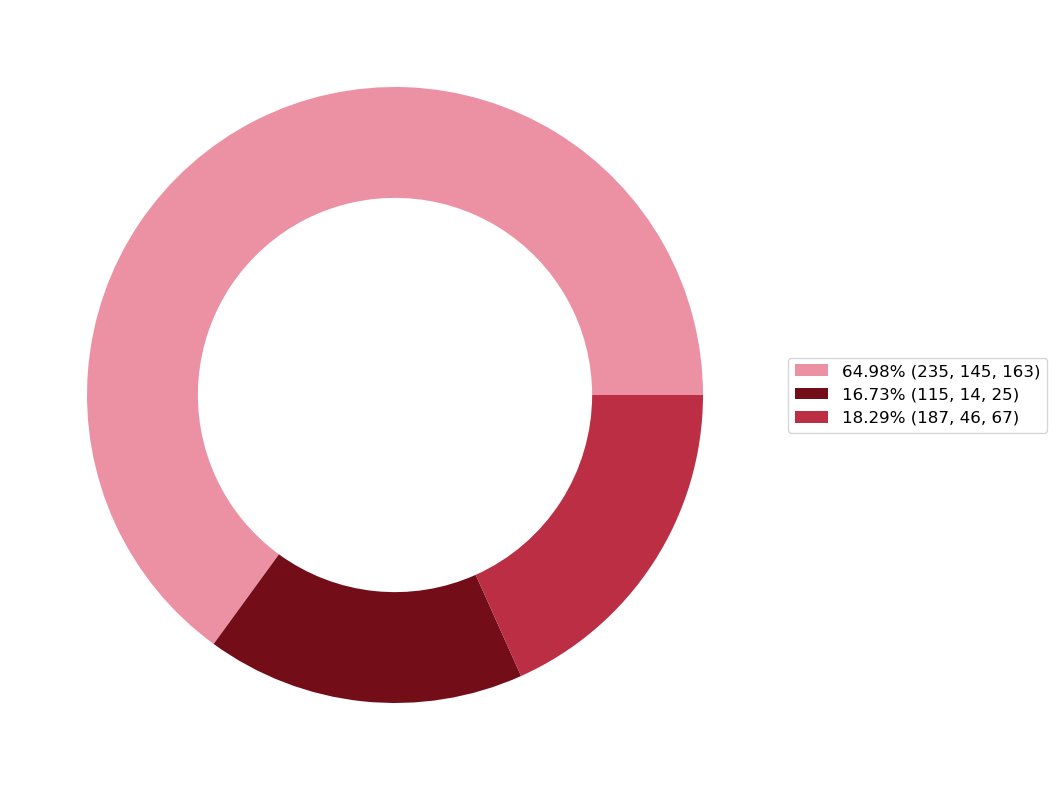

In [278]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(235, 145, 163), (115, 14, 25), (187, 46, 67)]
percentages = np.array([(167/257), (43/257), (47/257)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

1    110
0    103
2     87
Name: clust, dtype: int64


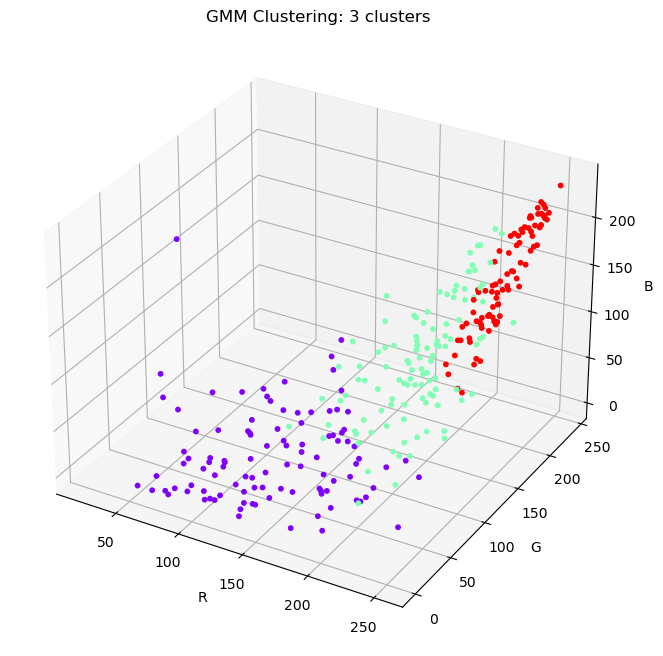

                R           G           B
clust                                    
0      145.223301   30.941748   50.048544
1      219.645455   99.854545  132.636364
2      246.402299  170.057471  181.839080


In [280]:
#가우시안 확률 분포
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
df = pd.read_csv('C:/Users/User/Desktop/color/romantic/romantic.csv', encoding='cp949')
gmm_model = GaussianMixture(n_components=3)  # Specify the number of clusters you want
gmm_model.fit(df)
labels = gmm_model.predict(df)
df['clust'] = labels
cluster_counts = df['clust'].value_counts()
print(cluster_counts)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'GMM Clustering: {len(cluster_counts)} clusters')
plt.show()
cluster_mean = df.groupby('clust').mean()
print(cluster_mean)

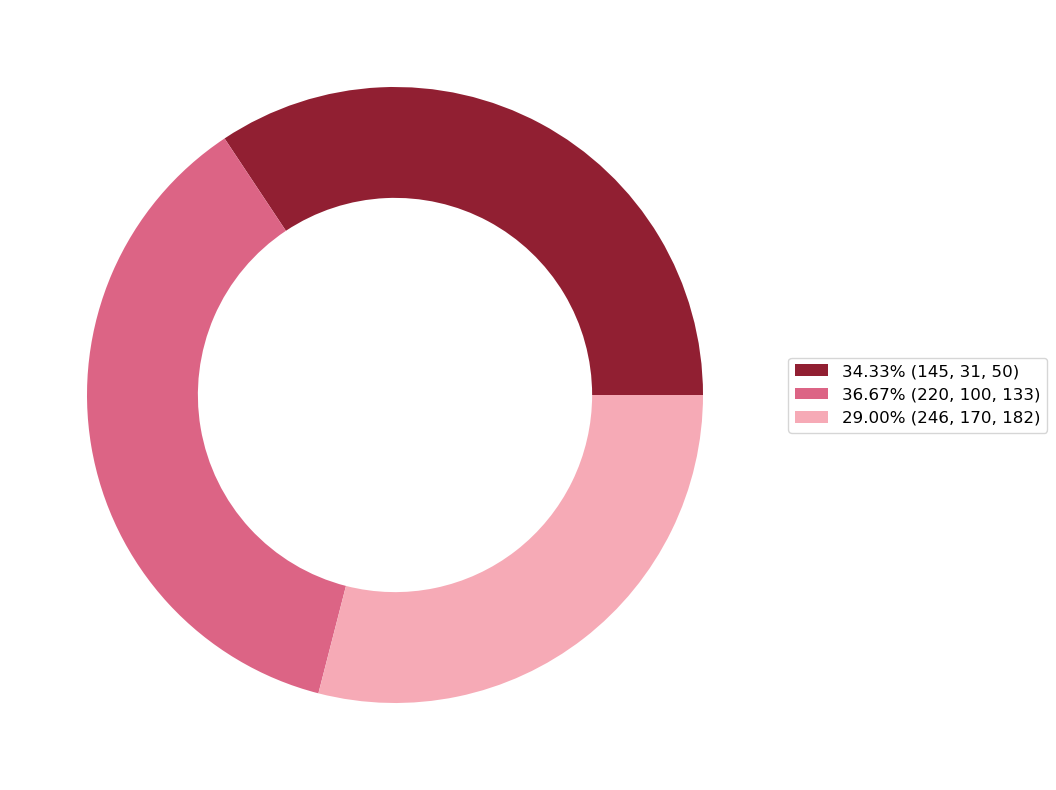

In [281]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(145, 31, 50), (220, 100, 133), (246, 170, 182)]
percentages = np.array([(103/300), (110/300), (87/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

 0    290
-1     10
Name: clust, dtype: int64


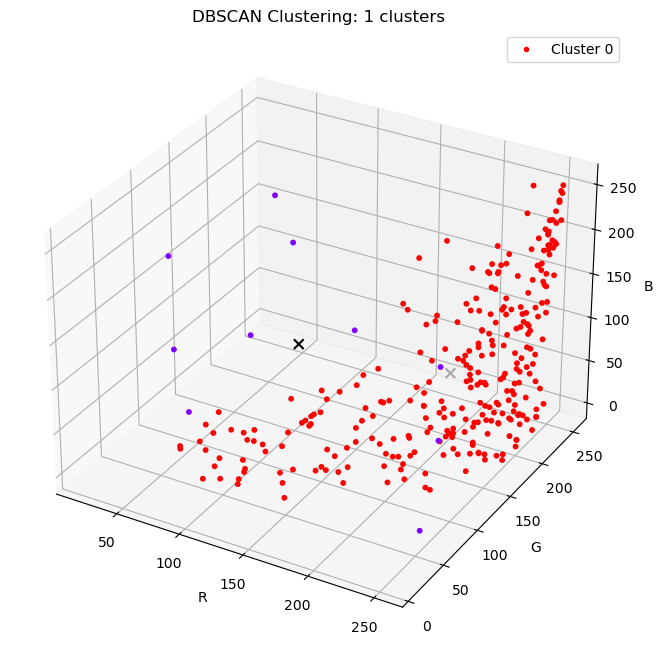

                R           G           B
clust                                    
-1     124.900000  113.100000  119.200000
 0     211.986207  171.941379   81.268966


In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

df = pd.read_csv('C:/Users/User/Desktop/color/joy/joy.csv', encoding='cp949')
df_f = df.copy()

# Create the DBSCAN model
dbscan_model = DBSCAN(eps=60.0, min_samples=37)

# Fit the model to the data
dbscan_model.fit(df_f)

# Get the cluster labels
labels = dbscan_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of dots in each cluster
cluster_counts = df_f['clust'].value_counts()
print(cluster_counts)

# Get the unique cluster labels (excluding noise points)
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - 1

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'DBSCAN Clustering: {n_clusters} clusters')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels if label != -1]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels if label != -1]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

0    278
2     16
1      6
Name: clust, dtype: int64


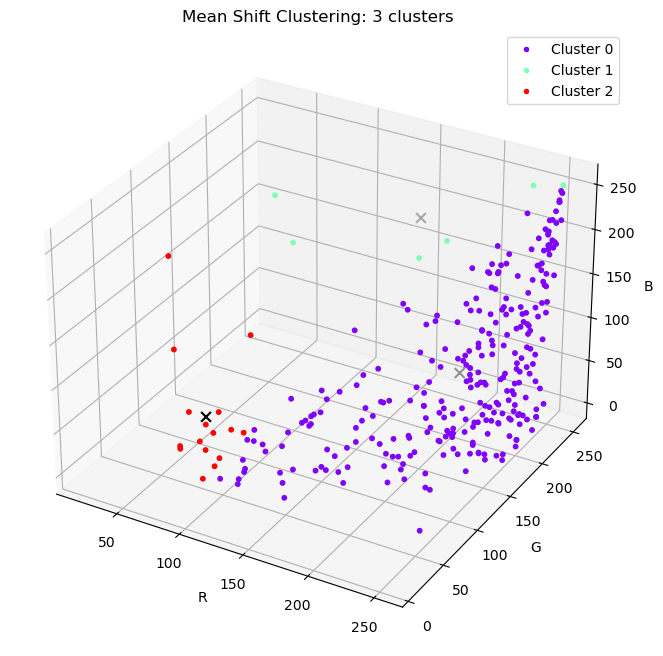

                R           G           B
clust                                    
0      217.467626  175.201439   81.489209
1      167.166667  210.500000  212.500000
2       79.125000   64.062500   51.937500


In [354]:
#mean shift
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

df = pd.read_csv('C:/Users/User/Desktop/color/joy/joy.csv', encoding='cp949')
df_f = df.copy()

# Create the Mean Shift model
meanshift_model = MeanShift()

# Fit the model to the data
meanshift_model.fit(df_f)

# Get the cluster labels
labels = meanshift_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = df_f['clust'].value_counts()
print(cluster_counts)

# Get the unique cluster labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'Mean Shift Clustering: {n_clusters} clusters')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

0    116
3     92
2     49
1     43
dtype: int64


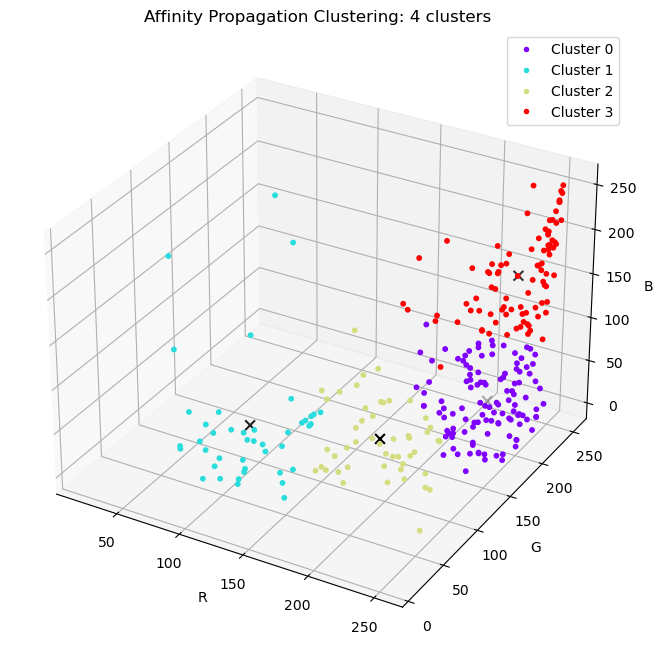

                R           G           B
clust                                    
0      234.422414  184.793103   49.767241
1      105.348837   79.162791   42.767442
2      186.510204  117.285714   34.673469
3      237.641304  221.815217  167.923913


In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/User/Desktop/color/joy/joy.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Create the Affinity Propagation model with a lower preference value
affinity_propagation_model = AffinityPropagation(damping=0.8, preference=-40)

# Fit the model to the data
affinity_propagation_model.fit(df_f_scaled)

# Get the cluster labels
labels = affinity_propagation_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)

# Get the unique cluster labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'Affinity Propagation Clustering: {n_clusters} clusters')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

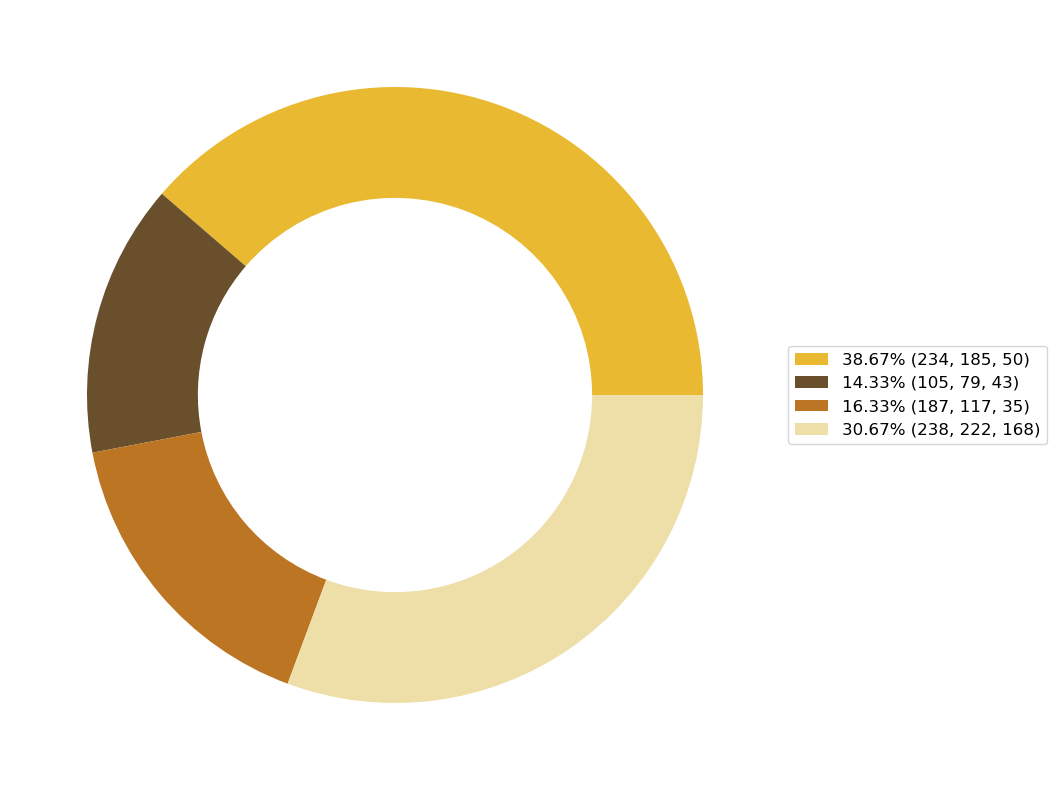

In [361]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(234, 185, 50), (105, 79, 43), (187, 117, 35),(238,222,168)]
percentages = np.array([(116/300), (43/300), (49/300),(92/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

2    92
0    78
3    73
1    57
dtype: int64


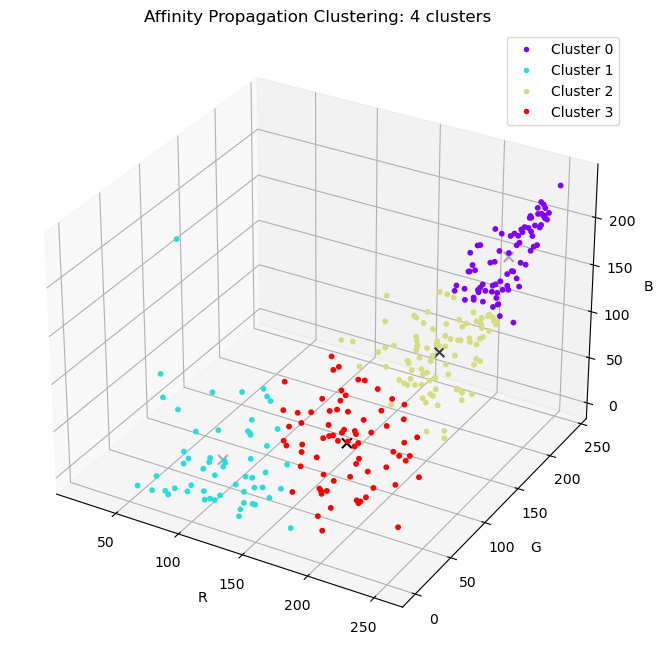

                R           G           B
clust                                    
0      244.000000  180.128205  197.589744
1      112.087719   21.807018   38.666667
2      227.923913  112.065217  136.793478
3      194.054795   46.068493   73.479452


In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/User/Desktop/color/romantic/romantic.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Create the Affinity Propagation model with a lower preference value
affinity_propagation_model = AffinityPropagation(damping=0.8, preference=-40)

# Fit the model to the data
affinity_propagation_model.fit(df_f_scaled)

# Get the cluster labels
labels = affinity_propagation_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)

# Get the unique cluster labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'Affinity Propagation Clustering: {n_clusters} clusters')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

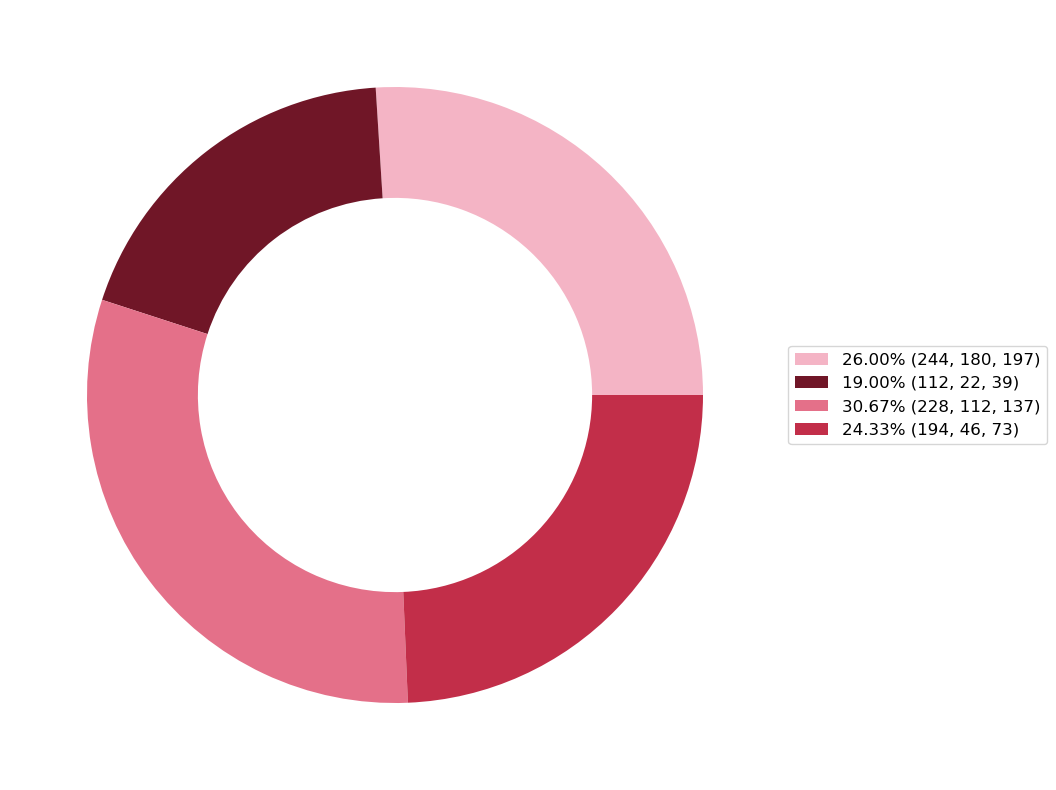

In [363]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(244, 180, 197), (112, 22, 39), (228, 112, 137),(194,46,73)]
percentages = np.array([(78/300), (57/300), (92/300),(73/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

0    108
1    107
2     85
dtype: int64


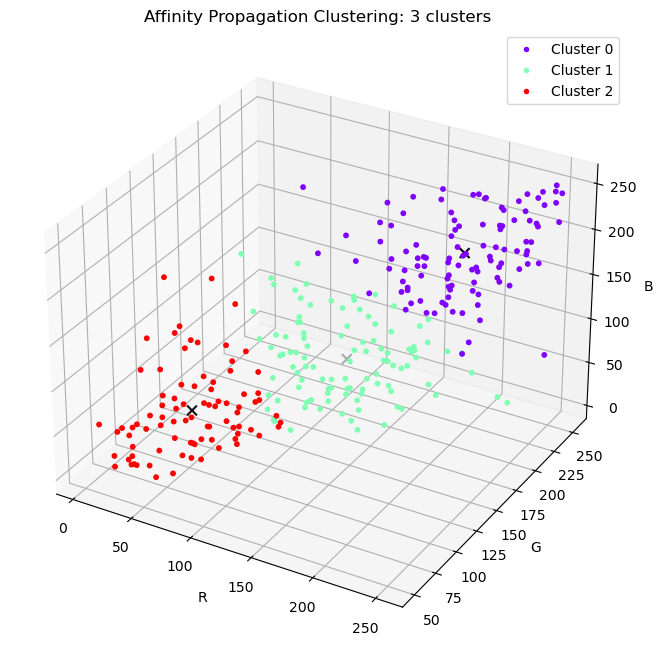

                R           G           B
clust                                    
0      194.824074  222.203704  182.138889
1      127.710280  178.093458   73.373832
2       51.011765  103.105882   48.070588


In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/User/Desktop/color/healing/healing.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Create the Affinity Propagation model with a lower preference value
affinity_propagation_model = AffinityPropagation(damping=0.8, preference=-40)

# Fit the model to the data
affinity_propagation_model.fit(df_f_scaled)

# Get the cluster labels
labels = affinity_propagation_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)

# Get the unique cluster labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'Affinity Propagation Clustering: {n_clusters} clusters')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

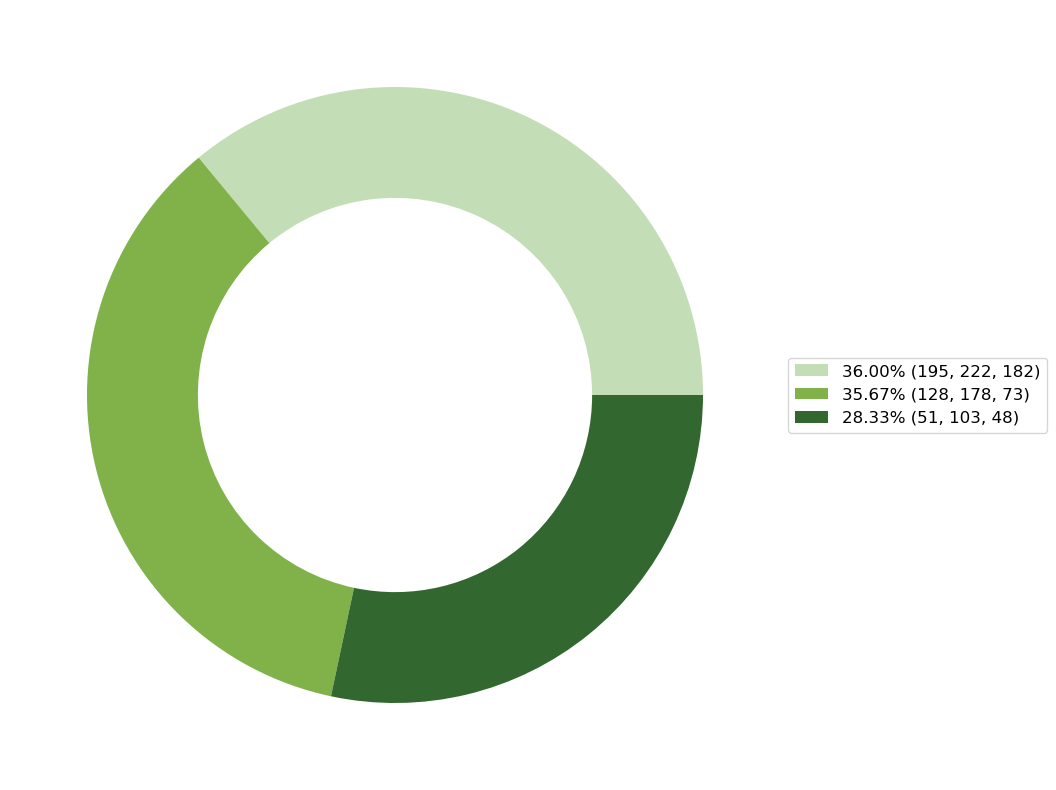

In [365]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(195, 222, 182), (128, 178, 73), (51, 103, 48)]
percentages = np.array([(108/300), (107/300), (85/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

0    115
2     86
3     57
1     42
dtype: int64


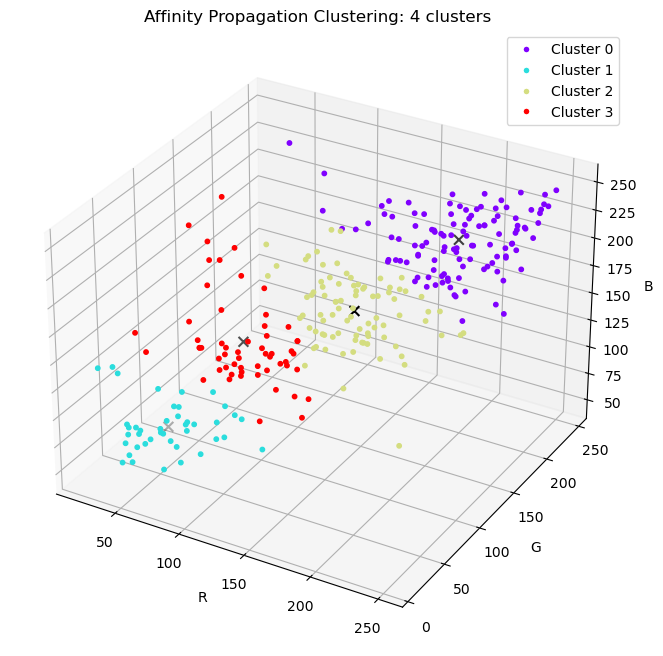

                R           G           B
clust                                    
0      205.226087  183.113043  221.373913
1       63.357143   40.714286   86.785714
2      160.511628  121.151163  177.860465
3       97.701754   82.403509  151.333333


In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/User/Desktop/color/dreamy/dreamy.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Create the Affinity Propagation model with a lower preference value
affinity_propagation_model = AffinityPropagation(damping=0.8, preference=-40)

# Fit the model to the data
affinity_propagation_model.fit(df_f_scaled)

# Get the cluster labels
labels = affinity_propagation_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)

# Get the unique cluster labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'Affinity Propagation Clustering: {n_clusters} clusters')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

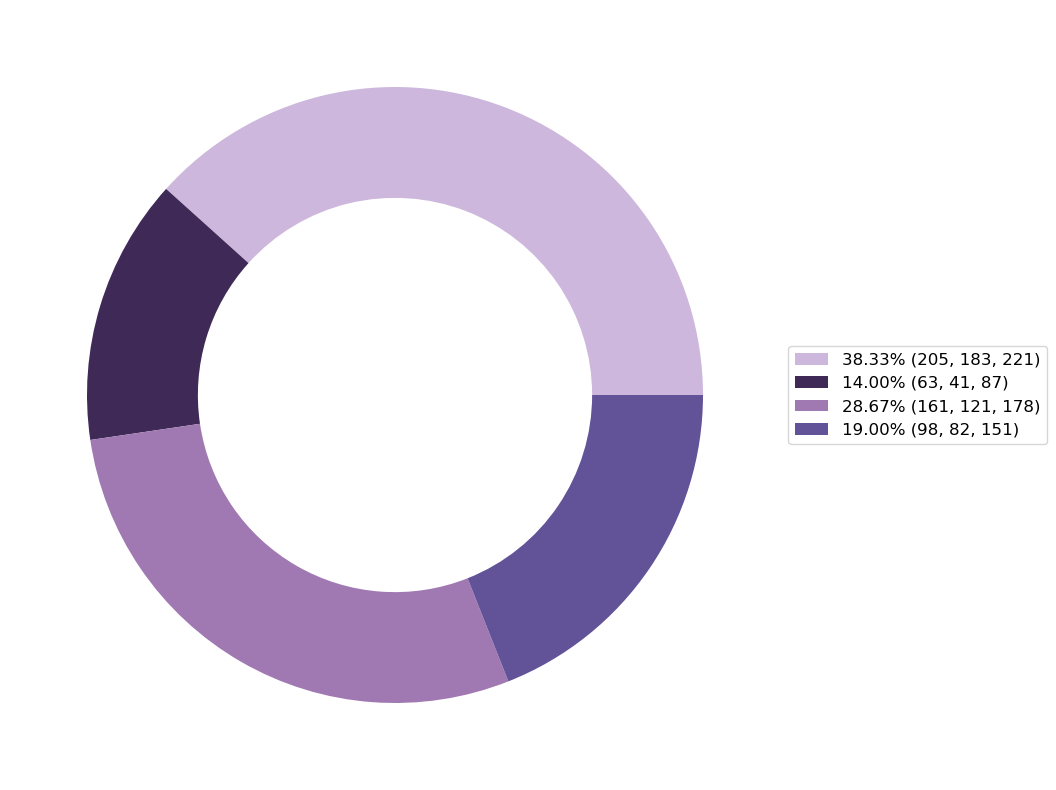

In [367]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(205, 183, 221), (63, 41, 87), (161, 121, 178),(98,82,151)]
percentages = np.array([(115/300), (42/300), (86/300),(57/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

3    97
2    88
1    60
0    55
dtype: int64


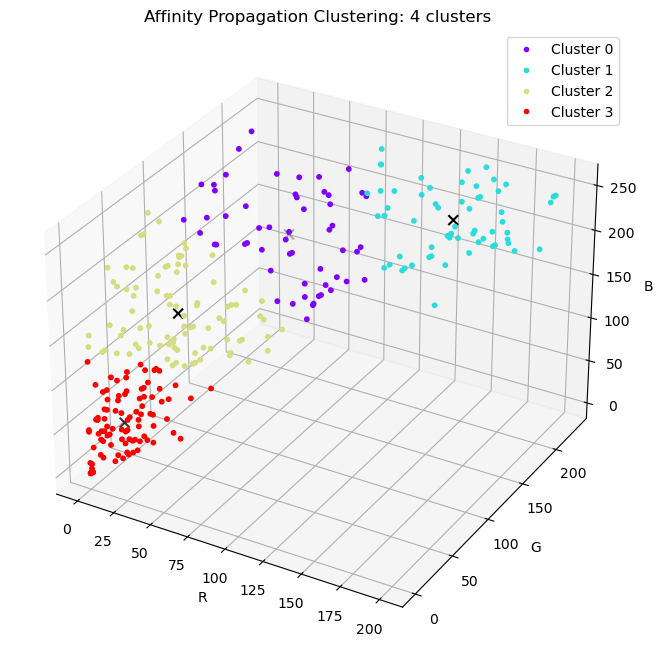

                R           G           B
clust                                    
0       62.909091  139.018182  200.163636
1      147.850000  188.483333  220.950000
2       23.511364   70.329545  141.306818
3       11.134021   23.505155   45.865979


In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/User/Desktop/color/depressed/depressed_ext.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Create the Affinity Propagation model with a lower preference value
affinity_propagation_model = AffinityPropagation(damping=0.8, preference=-40)

# Fit the model to the data
affinity_propagation_model.fit(df_f_scaled)

# Get the cluster labels
labels = affinity_propagation_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)

# Get the unique cluster labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'Affinity Propagation Clustering: {n_clusters} clusters')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

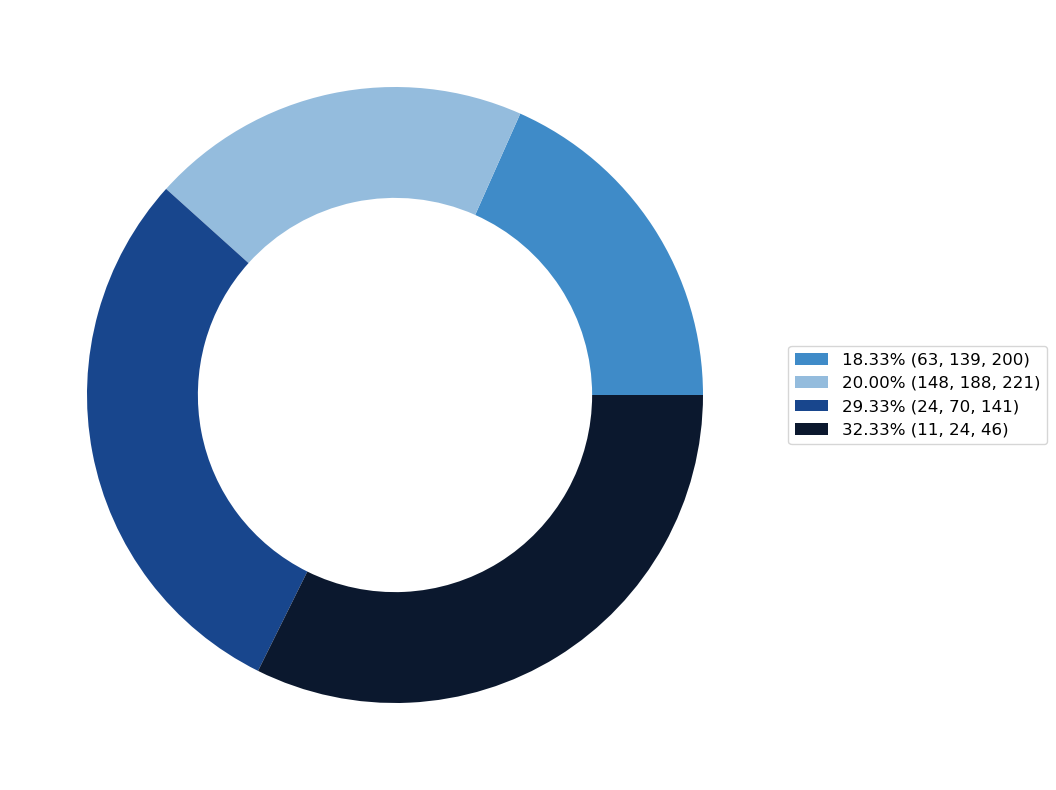

In [369]:
import numpy as np
import matplotlib.pyplot as plt

palette = [(63, 139, 200), (148, 188, 221), (24, 70, 141),(11,24,46)]
percentages = np.array([(55/300), (60/300), (88/300),(97/300)])
# Normalize percentages to sum up to 1
sum_percentages = np.sum(percentages)
normalized_percentages = percentages / sum_percentages

# Normalize RGB values to range 0-1
normalized_palette = np.array(palette) / 255.0

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text = ax.pie(normalized_percentages, colors=normalized_palette, wedgeprops=dict(width=0.3))

# Set equal aspect ratio
ax.set_aspect('equal')

# Create space in the center
plt.setp(wedges, width=0.36)
ax.set_aspect('equal')
fig.set_facecolor('white')

# Add labels
labels = [f'{p:.2%} ({r}, {g}, {b})' for p, (r, g, b) in zip(normalized_percentages, palette)]
ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.show()

0    108
1    107
2     85
dtype: int64
Silhouette Score: 0.4208807632098052


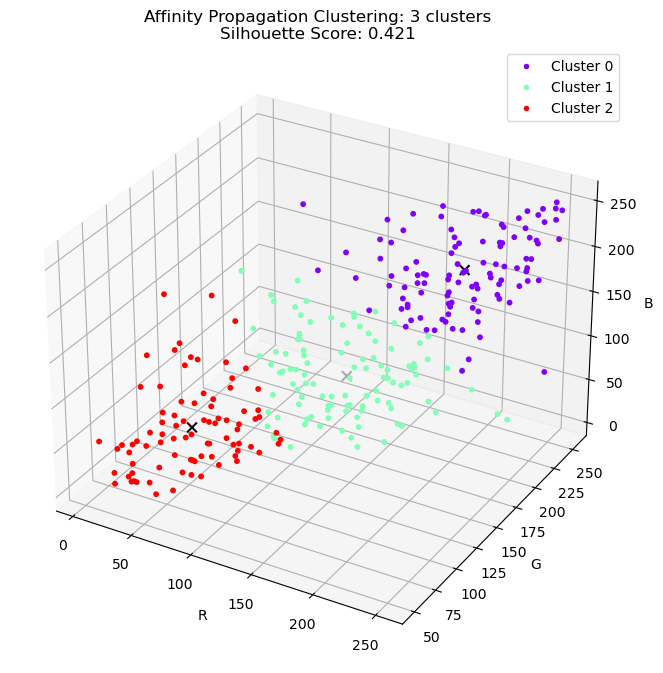

                R           G           B
clust                                    
0      194.824074  222.203704  182.138889
1      127.710280  178.093458   73.373832
2       51.011765  103.105882   48.070588


In [394]:
#테스트 방법-실루엣 적용#affim algo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('C:/Users/User/Desktop/color/healing/healing.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Create the Affinity Propagation model with a lower preference value
affinity_propagation_model = AffinityPropagation(damping=0.8, preference=-40)

# Fit the model to the data
affinity_propagation_model.fit(df_f_scaled)

# Get the cluster labels
labels = affinity_propagation_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)

# Get the unique cluster labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_f_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'Affinity Propagation Clustering: {n_clusters} clusters\nSilhouette Score: {silhouette_avg:.3f}')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

0    106
2    102
1     92
Name: clust, dtype: int64
Silhouette Score: 0.4210224448119888


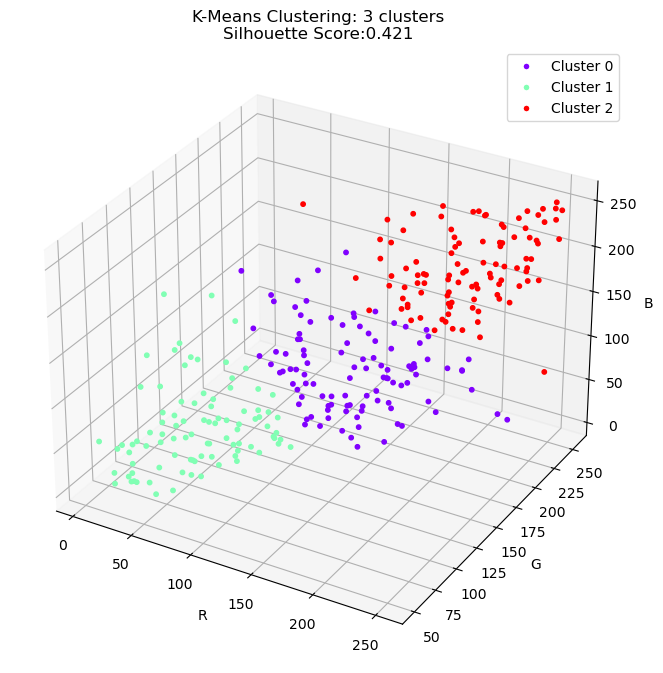

                R           G           B
clust                                    
0      132.075472  181.471698   79.641509
1       53.945652  106.369565   46.673913
2      196.852941  223.490196  185.019608


In [395]:
#test-실루엣 적용-k means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Read the data and perform scaling
df = pd.read_csv('C:/Users/User/Desktop/color/healing/healing.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Perform K-Means clustering with a chosen number of clusters
n_clusters = 3  # Update with the desired number of clusters
kmeans_model = KMeans(n_clusters=n_clusters)
kmeans_model.fit(df_f_scaled)
labels = kmeans_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = df_f['clust'].value_counts()
print(cluster_counts)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_f_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'K-Means Clustering: {n_clusters} clusters\nSilhouette Score:{silhouette_avg:.3f}')

# Create a legend
unique_labels = np.unique(labels)
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

0    116
3     92
2     49
1     43
dtype: int64
Silhouette Score: 0.3860107588093985


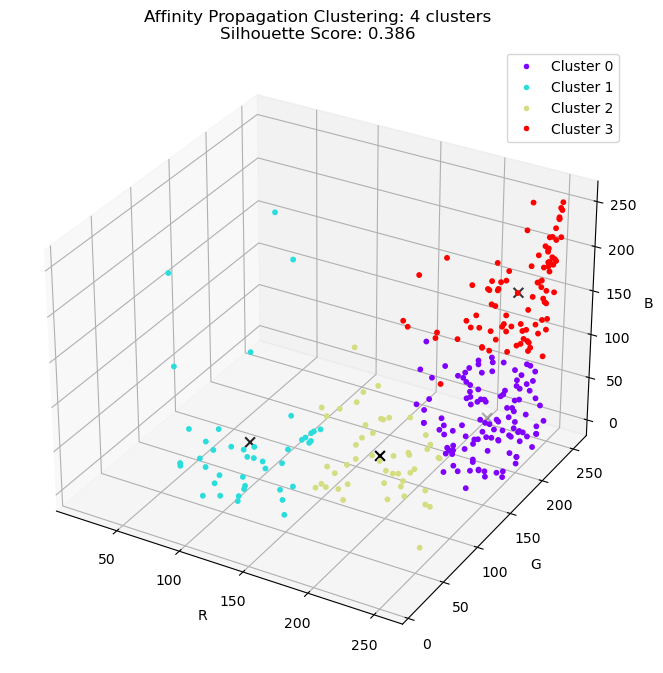

                R           G           B
clust                                    
0      234.422414  184.793103   49.767241
1      105.348837   79.162791   42.767442
2      186.510204  117.285714   34.673469
3      237.641304  221.815217  167.923913


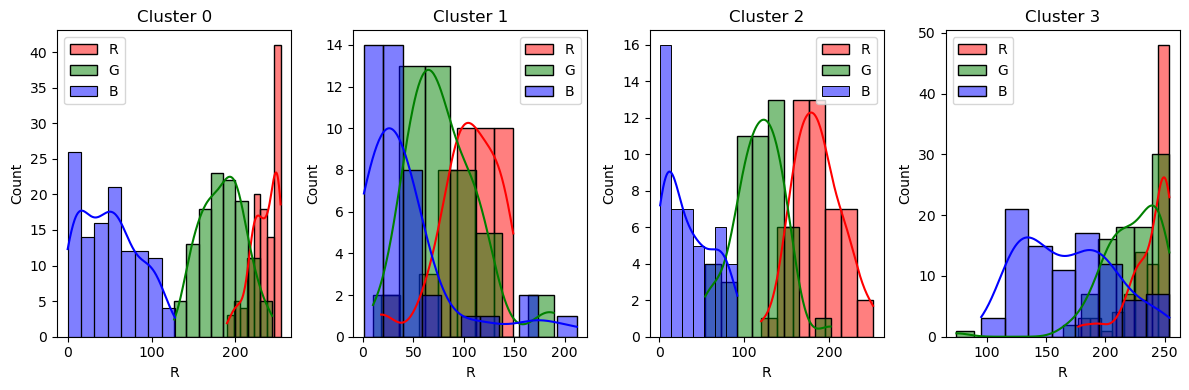

In [416]:
#affinity+silhouette+clustering distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv('C:/Users/User/Desktop/color/joy/joy.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Create the Affinity Propagation model with a lower preference value
affinity_propagation_model = AffinityPropagation(damping=0.8, preference=-40)

# Fit the model to the data
affinity_propagation_model.fit(df_f_scaled)

# Get the cluster labels
labels = affinity_propagation_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = pd.Series(labels).value_counts()
print(cluster_counts)

# Get the unique cluster labels
unique_labels = np.unique(labels)
n_clusters = len(unique_labels)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_f_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Plot the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'Affinity Propagation Clustering: {n_clusters} clusters\nSilhouette Score: {silhouette_avg:.3f}')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

# Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()

# Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

# Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

# Plot the cluster distribution
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(12, 4))

for i, cluster_label in enumerate(unique_labels):
    cluster_data = df_f[df_f['clust'] == cluster_label]
    sns.histplot(data=cluster_data, x='R', kde=True, ax=axes[i], color='red', label='R')
    sns.histplot(data=cluster_data, x='G', kde=True, ax=axes[i], color='green', label='G')
    sns.histplot(data=cluster_data, x='B', kde=True, ax=axes[i], color='blue', label='B')
    
    axes[i].set_title(f'Cluster {cluster_label}')
    axes[i].legend()

plt.tight_layout()
plt.show()


2    137
0     99
1     64
Name: clust, dtype: int64
Silhouette Score: 0.4434848981391042


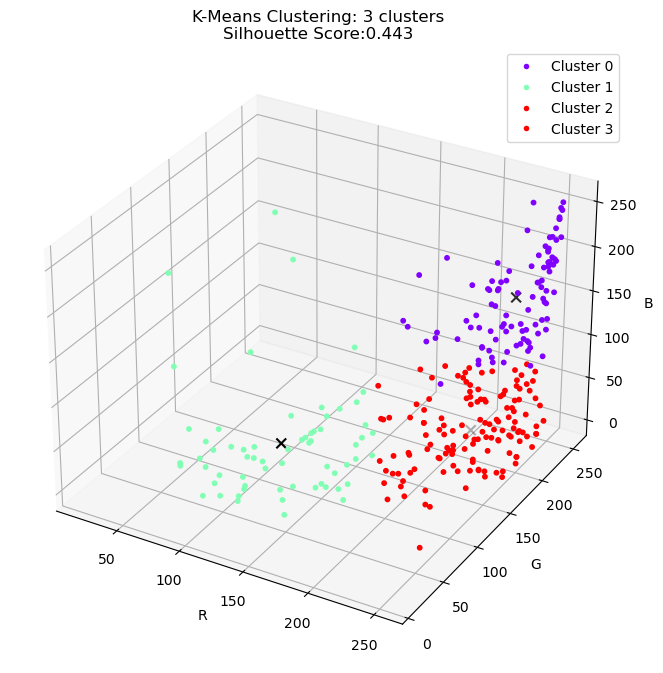

                R           G           B
clust                                    
0      236.969697  219.808081  163.707071
1      124.437500   89.046875   42.546875
2      228.474453  171.781022   42.554745


IndexError: index 3 is out of bounds for axis 0 with size 3

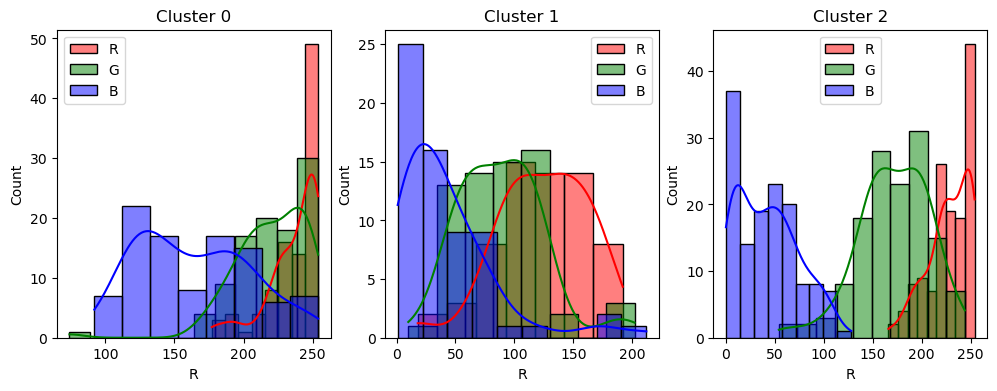

In [414]:
#k-means+silhouette+clustering distribution
#test-실루엣 적용-k means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Read the data and perform scaling
df = pd.read_csv('C:/Users/User/Desktop/color/joy/joy.csv', encoding='cp949')
df_f = df.copy()

# Scale the features
scaler = StandardScaler()
df_f_scaled = scaler.fit_transform(df_f)

# Perform K-Means clustering with a chosen number of clusters
n_clusters = 3  # Update with the desired number of clusters
kmeans_model = KMeans(n_clusters=n_clusters)
kmeans_model.fit(df_f_scaled)
labels = kmeans_model.labels_

# Add the cluster labels to the dataframe
df_f['clust'] = labels

# Count the number of points in each cluster
cluster_counts = df_f['clust'].value_counts()
print(cluster_counts)

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_f_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot of data points
scatter = ax.scatter(df_f.iloc[:, 0], df_f.iloc[:, 1], df_f.iloc[:, 2], c=labels, s=10, cmap="rainbow", alpha=1)

# Set labels and title
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title(f'K-Means Clustering: {n_clusters} clusters\nSilhouette Score:{silhouette_avg:.3f}')

# Create a legend
legend_labels = [f'Cluster {label}' for label in unique_labels]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=5) for label in unique_labels]
ax.legend(legend_handles, legend_labels, loc='best')

#Calculate the center point of each cluster
cluster_centers = df_f.groupby('clust').mean()


#Plot the center points
ax.scatter(cluster_centers.iloc[:, 0], cluster_centers.iloc[:, 1], cluster_centers.iloc[:, 2], c='black', s=50, marker='x')

plt.show()

#Calculate the mean of each cluster
cluster_mean = df_f.groupby('clust').mean()
print(cluster_mean)

#Plot the cluster distribution
fig, axes = plt.subplots(nrows=1, ncols=n_clusters, figsize=(12, 4))

for i, cluster_label in enumerate(unique_labels):
    cluster_data = df_f[df_f['clust'] == cluster_label]
    sns.histplot(data=cluster_data, x='R', kde=True, ax=axes[i], color='red', label='R')
    sns.histplot(data=cluster_data, x='G', kde=True, ax=axes[i], color='green', label='G')
    sns.histplot(data=cluster_data, x='B', kde=True, ax=axes[i], color='blue', label='B')
    axes[i].set_title(f'Cluster {cluster_label}')
    axes[i].legend()

plt.tight_layout()
plt.show()